In [2]:
from qiskit import (QuantumCircuit, execute, Aer)

In [3]:
circuit = QuantumCircuit(1, 1)

In [4]:
circuit.draw()

q_0: 
     
c_0:

In [5]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise
from qiskit.providers.aer.noise import pauli_error

# Error probabilities
prob_1 = 0.5  # 1-qubit gate

p_error = 0.05
error_1 = pauli_error([('X', p_error), ('I', 1 - p_error)])

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])


In [6]:
def addXs(pairs): 
    circuit = QuantumCircuit(1,1)
    for i in range(pairs):
        circuit.x(0)
        circuit.x(0)
    return circuit
circ = addXs(1500)
        

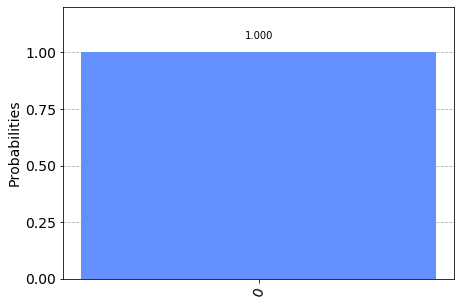

In [7]:
# Get basis gates from noise model
basis_gates = noise_model.basis_gates


# Perform a noise simulation
result = execute(circ, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)


In [9]:
%matplotlib inline
from qiskit import Aer, IBMQ, execute
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

provider = IBMQ.load_account()
provider.backends()
from qiskit.providers.aer.noise import NoiseModel
device_backend = provider.get_backend('ibmq_vigo')

# The device coupling map is needed for transpiling to correct
# CNOT gates before simulation
coupling_map = device_backend.configuration().coupling_map

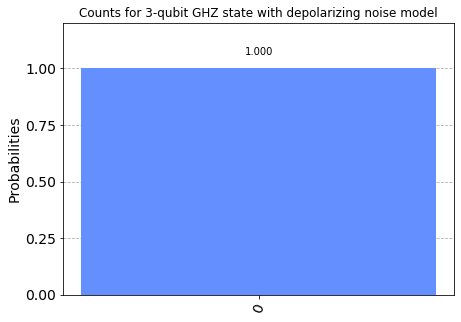

In [11]:
# Construct the noise model from backend properties
noise_model = NoiseModel.from_backend(device_backend)
basis_gates = noise_model.basis_gates
# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute noisy simulation and get counts
result_noise = execute(circ, simulator, 
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts(circ)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with depolarizing noise model")

In [12]:
circ

In [15]:
circ = QuantumCircuit(1,1)
circ.h(0)
circ.x(0)
circ.measure(0,0)
circ.draw()

┌───┐┌───┐┌─┐
q_0: ┤ H ├┤ X ├┤M├
     └───┘└───┘└╥┘
c_0: ═══════════╩═

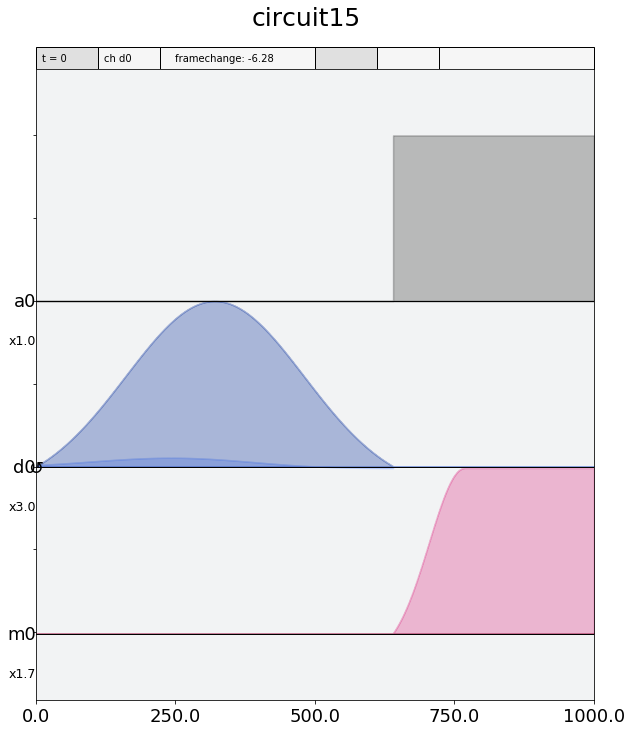

In [33]:
from qiskit.compiler import transpile
from qiskit import Aer
from qiskit.compiler import schedule
from qiskit import IBMQ


provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_armonk')
circ = transpile(circ, backend)
pulse_schedule = schedule(circ, backend)
# Plot the program representations.
circ.draw()
pulse_schedule.draw(plot_range = (0, 1000))



In [34]:
print(pulse_schedule.duration)


16640


In [35]:
pulse_schedule.duration = 3*pulse_schedule.duration

AttributeError: can't set attribute

In [1]:
import numpy as np

In [3]:
np.zeros((4,4,2))


array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])